In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
ctpmhg = np.load('catpaw_mahjong/simulation_results/unconditional_pairwise_results/all_results.npz')
cecnbdm = np.load('CECNBDM/simulation_results/unconditional_pairwise_results/all_results.npz')
cecpdm = np.load('CECPDM/simulation_results/unconditional_pairwise_results/all_results.npz')
cpdm_1 = np.load('CPDM/simulation_results/unconditional_pairwise_results/all_results.npz')
cpdm_100 = np.load('CPDM_100/simulation_results/unconditional_pairwise_results/all_results.npz')
cnbdm_1 = np.load('CNBDM/simulation_results/unconditional_pairwise_results/all_results.npz')
cnbdm_100 = np.load('CNBDM_100/simulation_results/unconditional_pairwise_results/all_results.npz')

In [3]:
def add_ticks(axes_axis):
    axes_axis.set_ticks([10, 20, 30, 40, 50, 60, 70., 80, 90.])
    axes_axis.set_minor_locator(mtick.FixedLocator([5, 15, 25, 35, 45, 55, 65, 75, 85]))
    axes_axis.set_minor_formatter(mtick.FixedFormatter(['.01%', '.02%', '.05%', '0.1%', '0.2%', '0.5%', '1.0%', '2.0%', '5.0%']))

In [4]:
ctpmhg.files

['divergences', 'pvals', 'difference_vectors']

In [5]:
base_relative_abundances = [1e-4, 1e-3, 1e-2]

relative_abundances = [relative_abundance * number
                       for relative_abundance 
                       in base_relative_abundances
                       for number in (1,2,5) 
                       for repeat in range(10)]

relative_abundances += [1-sum(relative_abundances)]
frequencies = np.array(relative_abundances)

rate = 2

number_droplets = int(15e6)

In [6]:
from simulations.unconditional_local_chi2_cpm import get_single_and_double_strain_0_probs, get_expected_counts

single_strain_0_probs, double_strain_0_probs = get_single_and_double_strain_0_probs(frequencies, rate)

In [7]:
expected_counts = np.zeros((frequencies.size, frequencies.size, 4))

for strain1 in range(frequencies.size):
    for strain2 in range(strain1+1, frequencies.size):
        expected_counts[strain1, strain2, :] = get_expected_counts(strain1, strain2, single_strain_0_probs,
                                                               double_strain_0_probs, number_droplets)

In [8]:
expected_counts.shape

(91, 91, 4)

In [9]:
expected_counts = expected_counts.reshape((*expected_counts.shape,1))

## Average Percentage differences in droplets with both of two given strains

### Gluttonous Treatments

#### Catpaw mahjong

In [10]:
ctpmhg_difference_vectors = ctpmhg['difference_vectors']
ctpmhg_difference_vectors.shape

(91, 91, 4, 500)

In [11]:
ctpmhg_relative_differences = ctpmhg_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
relevant_ctpmhg_relative_differences = ctpmhg_relative_differences[...,3,:]

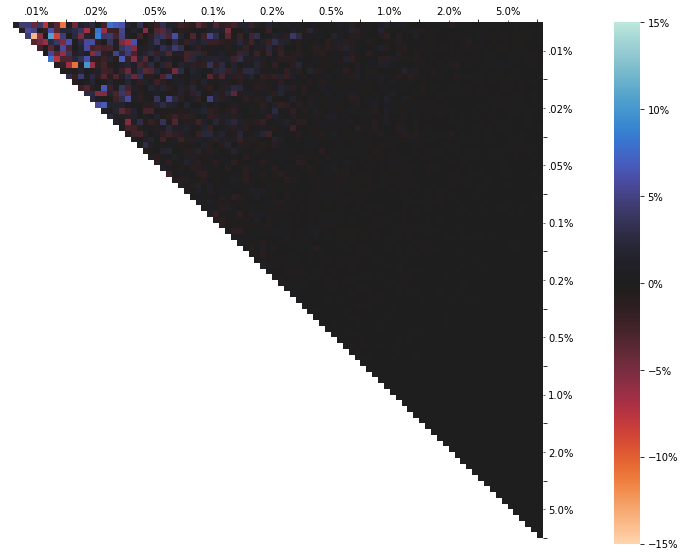

In [12]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_ctpmhg_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

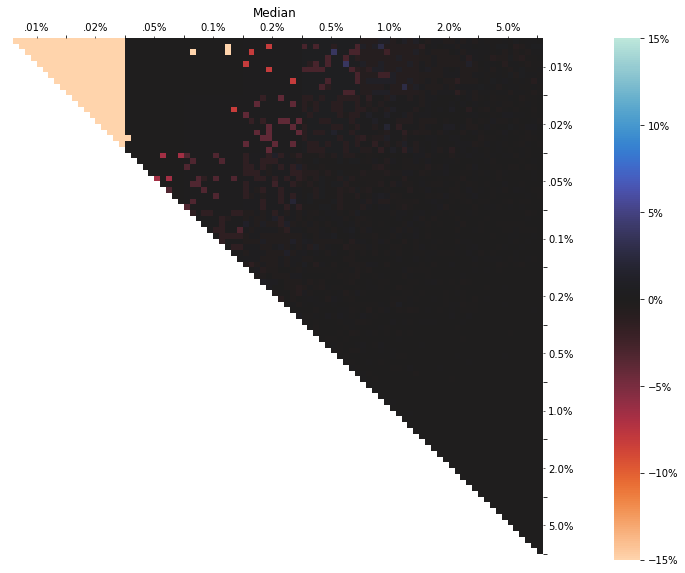

In [13]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_ctpmhg_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

plt.title('Median')

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CPDM $\zeta = 100$

In [14]:
cpdm_100_difference_vectors = cpdm_100['difference_vectors']

In [15]:
cpdm_100_relative_differences = cpdm_100_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))

In [16]:
relevant_cpdm_100_relative_differences = cpdm_100_relative_differences[...,3,:]

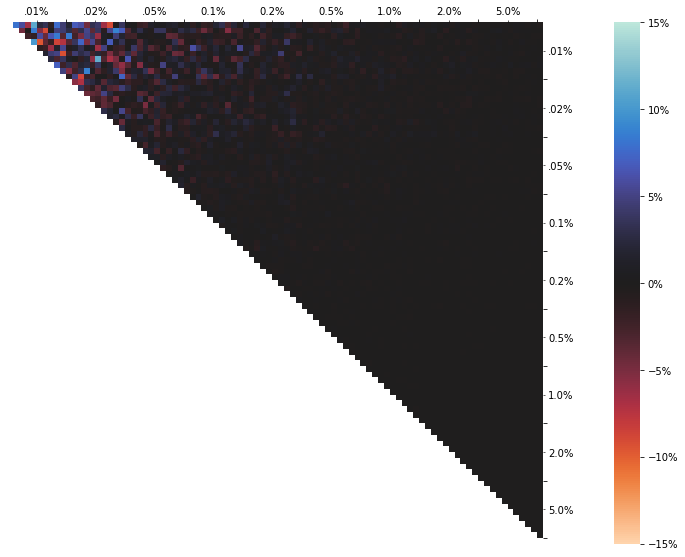

In [17]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_cpdm_100_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

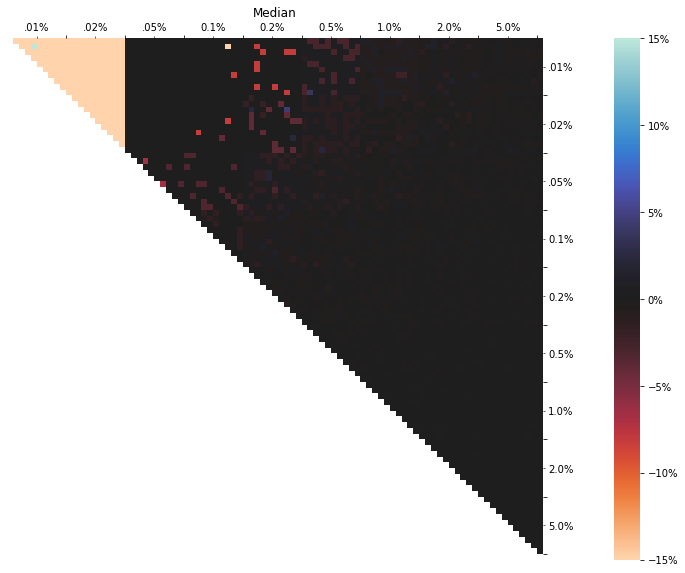

In [18]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_cpdm_100_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.title('Median')
add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CNBDM $\zeta = 100$

In [19]:
cnbdm_100_difference_vectors = cnbdm_100['difference_vectors']
cnbdm_100_relative_differences = cnbdm_100_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
relevant_cnbdm_100_relative_differences = cnbdm_100_relative_differences[...,3,:]

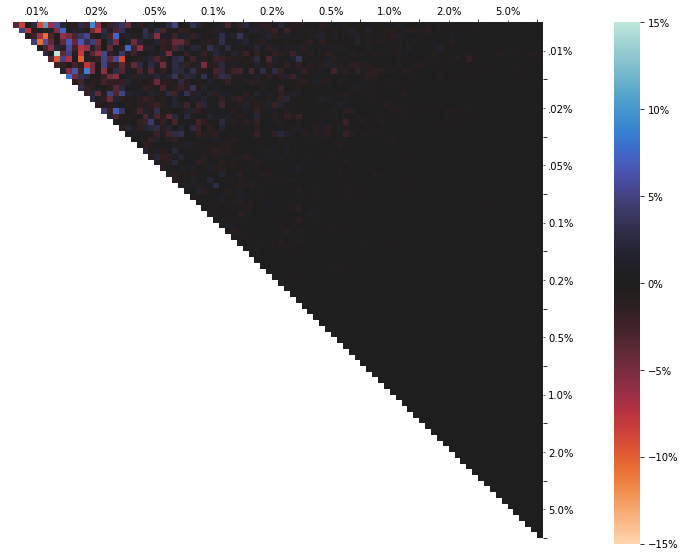

In [20]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_cnbdm_100_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

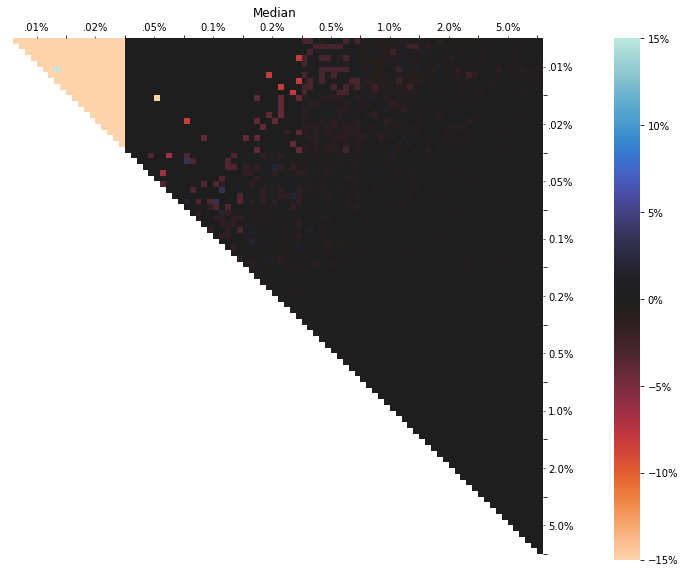

In [21]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_cnbdm_100_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.title('Median')
add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CPDM $\zeta=1$

In [22]:
cpdm_1_difference_vectors = cpdm_1['difference_vectors']
cpdm_1_relative_differences = cpdm_1_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
relevant_cpdm_1_relative_differences = cpdm_1_relative_differences[...,3,:]

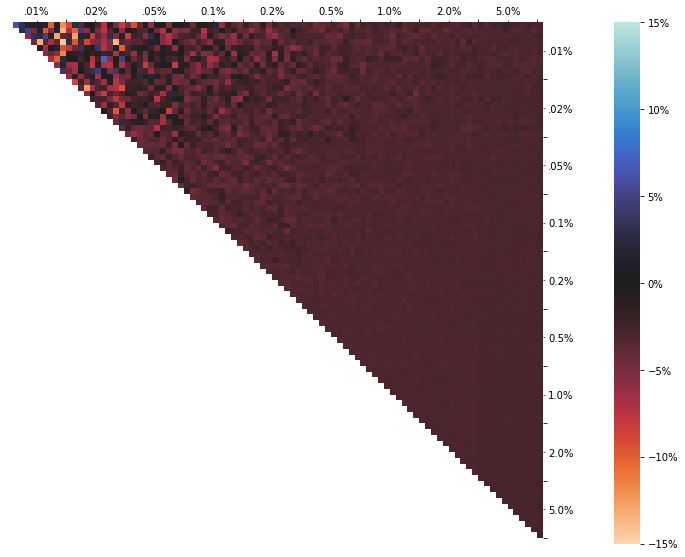

In [23]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_cpdm_1_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

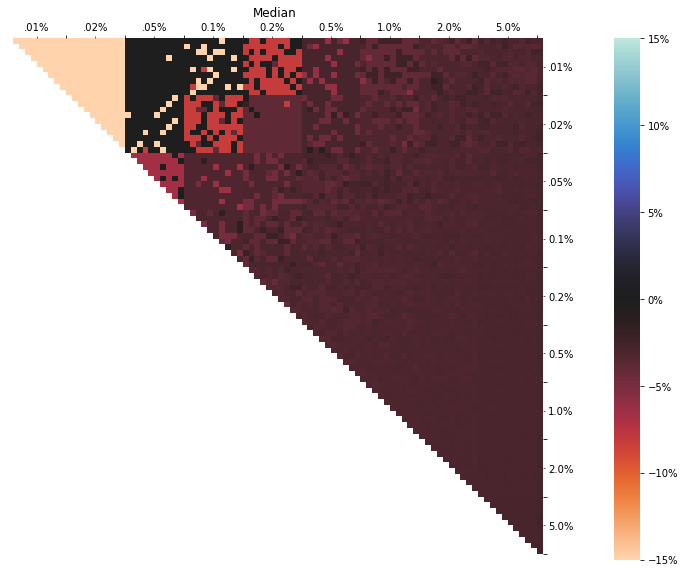

In [24]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_cpdm_1_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.title('Median')
add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CNBDM $\zeta=1$

In [25]:
cnbdm_1_difference_vectors = cnbdm_1['difference_vectors']
cnbdm_1_relative_differences = cnbdm_1_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
relevant_cnbdm_1_relative_differences = cnbdm_1_relative_differences[...,3,:]

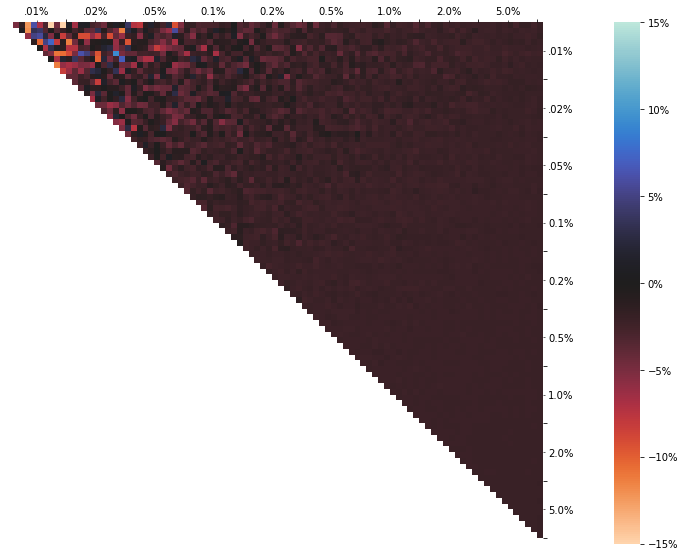

In [26]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_cnbdm_1_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

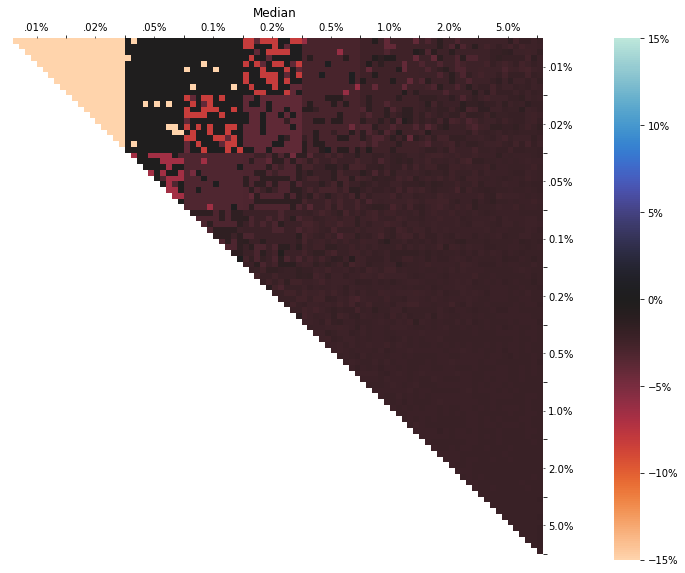

In [27]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_cnbdm_1_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.title('Median')
add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CPDM $\zeta \sim \operatorname{Exp}(1)$

In [28]:
cecpdm_difference_vectors = cecpdm['difference_vectors']
cecpdm_relative_differences = cecpdm_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
relevant_cecpdm_relative_differences = cecpdm_relative_differences[...,3,:]

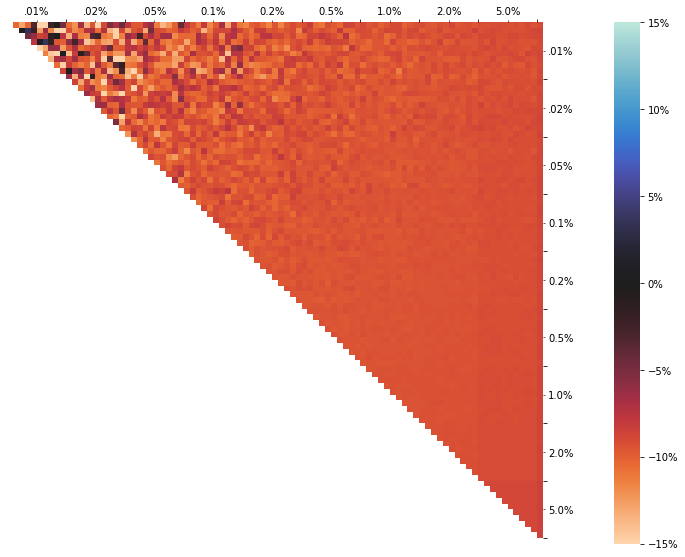

In [29]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_cecpdm_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

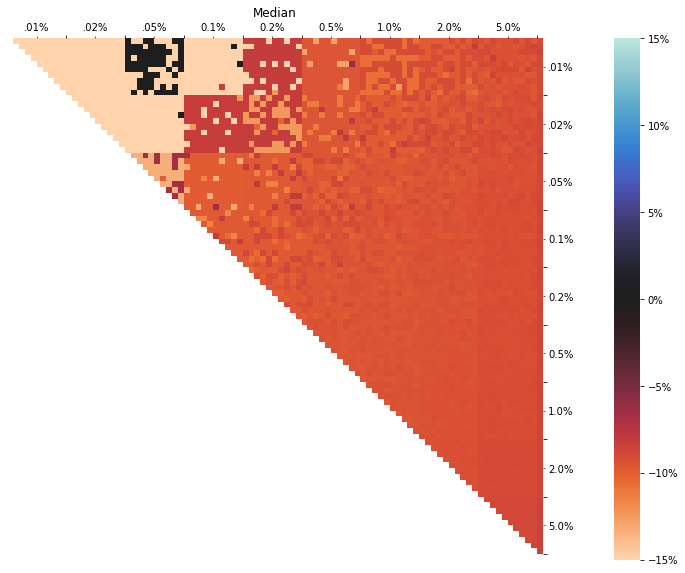

In [30]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_cecpdm_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.title('Median')
add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CNBDM $\zeta \sim \operatorname{Exp}(1)$

In [31]:
cecnbdm_difference_vectors = cecnbdm['difference_vectors']
cecnbdm_relative_differences = cecnbdm_difference_vectors / (expected_counts + (expected_counts == 0).astype(float))
relevant_cecnbdm_relative_differences = cecnbdm_relative_differences[...,3,:]

In [32]:
relevant_cecnbdm_relative_differences.shape

(91, 91, 500)

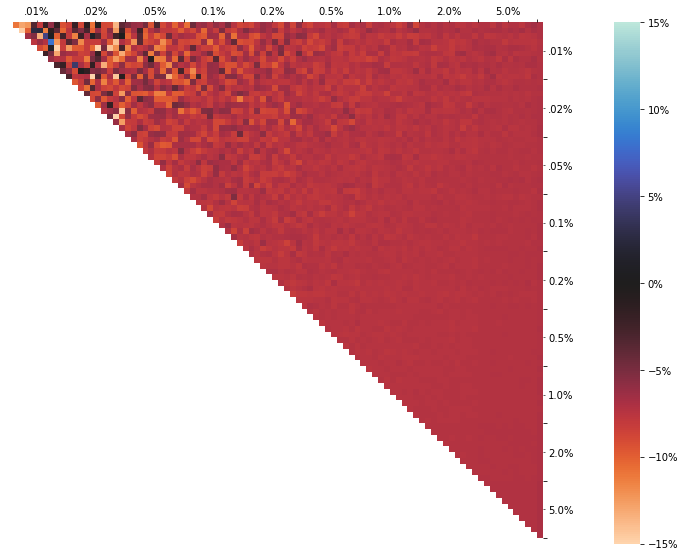

In [33]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(relevant_cecnbdm_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

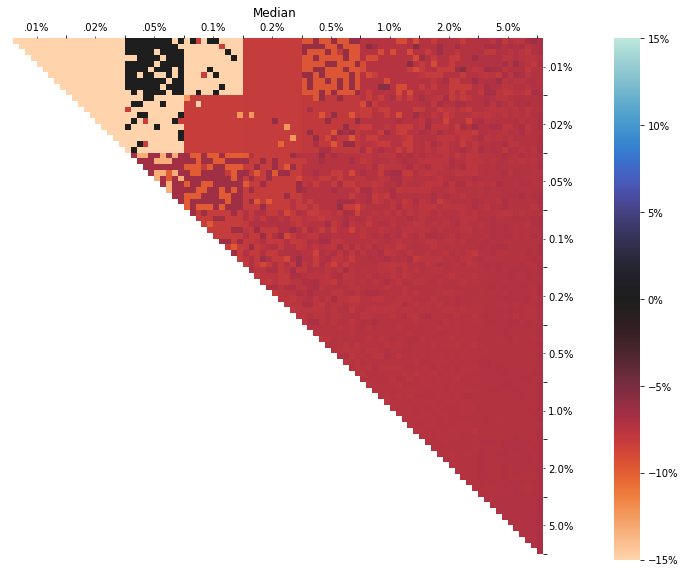

In [34]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.median(relevant_cecnbdm_relative_differences, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                vmin=-0.15,vmax=0.15, cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
plt.title('Median')
add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

## Abundance-grouped demo

In [35]:
def get_grouped_pct_diffs(pct_diffs):
    """Changed relative to version for picky_diffs where shape of array is different"""
    grouped_pct_diffs = {}
    for i in range(9):
        for j in range(i,9):
            if i != j:
                grouped_pct_diffs[i,j] = pct_diffs[i*10:(i+1)*10,j*10:(j+1)*10,:]
            elif i == j:
                grouped_pct_diffs[i,j] = np.array([])
                for simulation_number in range(500):
                    grouped_pct_diffs[i,j] = np.append(grouped_pct_diffs[i,j], pct_diffs[...,simulation_number][i*10:(i+1)*10,j*10:(j+1)*10][np.triu_indices(10, k=0)])
    return grouped_pct_diffs

In [36]:
grouped_cecnbdm_pct_diffs = get_grouped_pct_diffs(relevant_cecnbdm_relative_differences)

In [37]:
avg_grouped_cecnbdm_pct_diffs = np.zeros((9,9))
median_grouped_cecnbdm_pct_diffs = np.zeros((9,9))

for i in range(9):
    for j in range(i,9):
        avg_grouped_cecnbdm_pct_diffs[i,j] = np.mean(grouped_cecnbdm_pct_diffs[i,j])
        
for i in range(9):
    for j in range(i,9):
        median_grouped_cecnbdm_pct_diffs[i,j] = np.median(grouped_cecnbdm_pct_diffs[i,j])

Text(0.5, 1.0, 'average across strains with same abundances - hEXhNBDM, $\\zeta \\sim \\mathrm{Exp}(1)$')

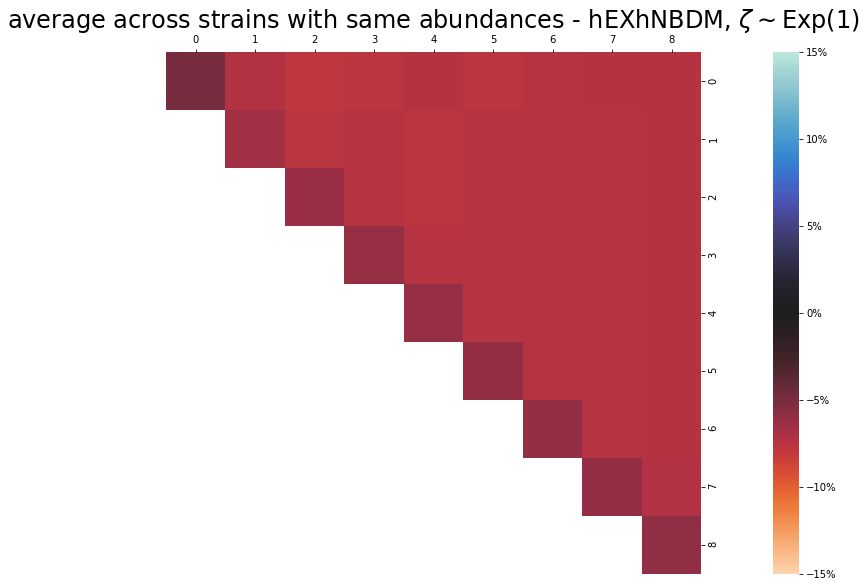

In [38]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(avg_grouped_cecnbdm_pct_diffs, 
                 mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                cmap='icefire_r', cbar_kws={'pad':0.1}, vmin=-0.15, vmax=0.15)
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

plt.title('average across strains with same abundances - hEXhNBDM, $\zeta \sim \mathrm{Exp}(1)$', fontsize=24)

Text(0.5, 1.0, 'average across strains with same abundances - hEXhNBDM, $\\zeta \\sim \\mathrm{Exp}(1)$')

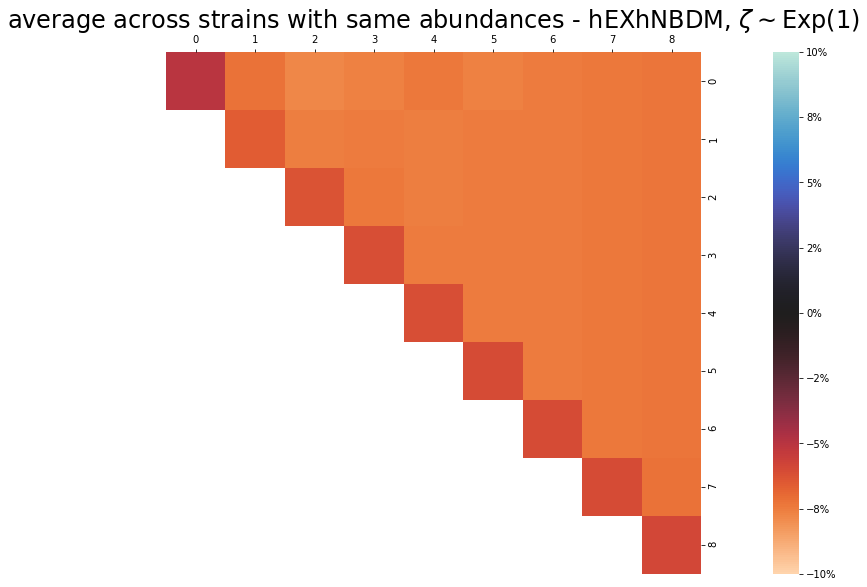

In [39]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(avg_grouped_cecnbdm_pct_diffs, 
                 mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                cmap='icefire_r', cbar_kws={'pad':0.1}, vmin=-0.1, vmax=0.1)
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

plt.title('average across strains with same abundances - hEXhNBDM, $\zeta \sim \mathrm{Exp}(1)$', fontsize=24)

Text(0.5, 1.0, 'median across strains with same abundances - hEXhNBDM, $\\zeta \\sim \\mathrm{Exp}(1)$')

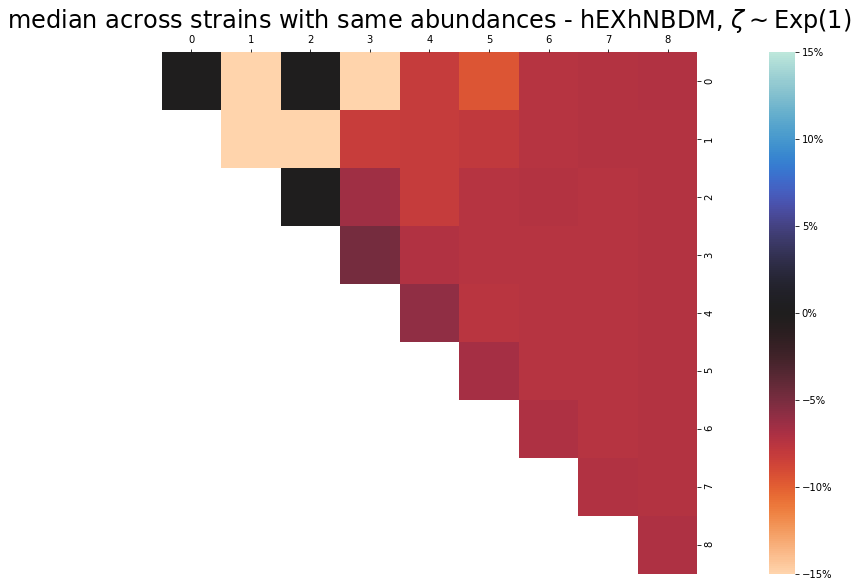

In [40]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(median_grouped_cecnbdm_pct_diffs, 
                 mask=np.tril(np.ones((9,9)).astype(bool), k=-1),
                cmap='icefire_r', cbar_kws={'pad':0.1}, vmin=-0.15, vmax=0.15)
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

plt.title('median across strains with same abundances - hEXhNBDM, $\zeta \sim \mathrm{Exp}(1)$', fontsize=24)

## Average Percentage Change in Droplets with one given strain but not the other

### Gluttonous Controls

In [41]:
expected_gluttonous_controls = (expected_counts[...,1,:] + np.swapaxes(expected_counts[...,2,:],0,1))

#### Catpaw mahjong

In [42]:
ctpmhg_difference_vectors_gluttonous_controls = (ctpmhg_difference_vectors[...,1,:] + np.swapaxes(ctpmhg_difference_vectors[...,2,:],0,1))

In [43]:
ctpmhg_difference_vectors_gluttonous_controls_rel_differences = ctpmhg_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

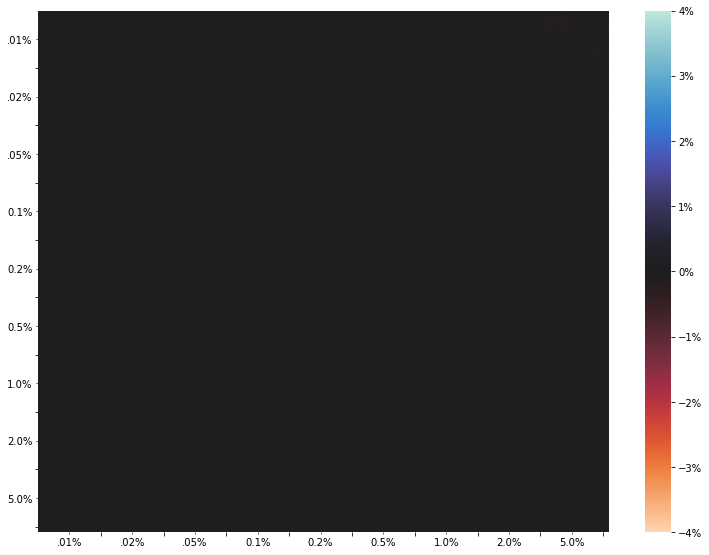

In [44]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(ctpmhg_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CPDM $\zeta = 100$

In [45]:
cpdm_100_difference_vectors_gluttonous_controls = (cpdm_100_difference_vectors[...,1,:] + np.swapaxes(cpdm_100_difference_vectors[...,2,:],0,1))
cpdm_100_difference_vectors_gluttonous_controls_rel_differences = cpdm_100_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

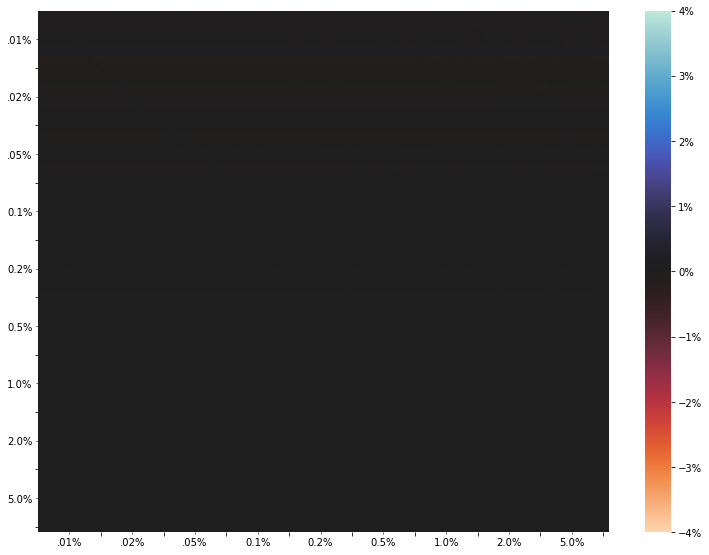

In [46]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cpdm_100_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CNBDM $\zeta = 100$

In [47]:
cnbdm_100_difference_vectors_gluttonous_controls = (cnbdm_100_difference_vectors[...,1,:] + np.swapaxes(cnbdm_100_difference_vectors[...,2,:],0,1))
cnbdm_100_difference_vectors_gluttonous_controls_rel_differences = cnbdm_100_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

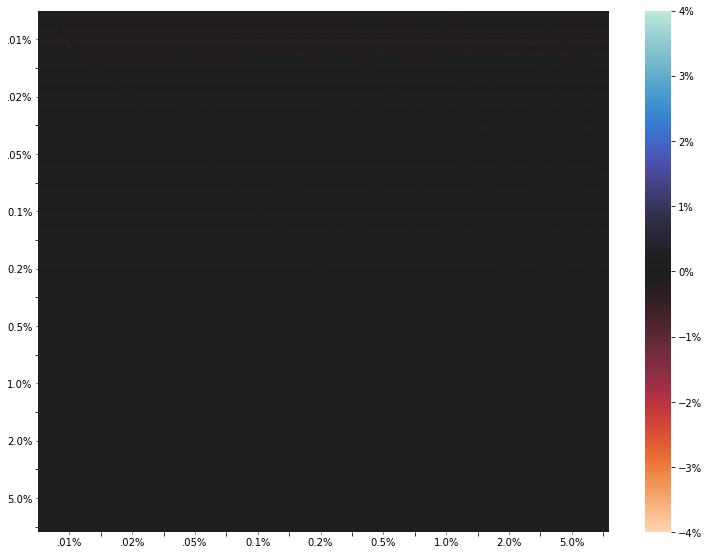

In [48]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cnbdm_100_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CPDM $\zeta = 1$

In [49]:
cpdm_1_difference_vectors_gluttonous_controls = (cpdm_1_difference_vectors[...,1,:] + np.swapaxes(cpdm_1_difference_vectors[...,2,:],0,1))
cpdm_1_difference_vectors_gluttonous_controls_rel_differences = cpdm_1_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

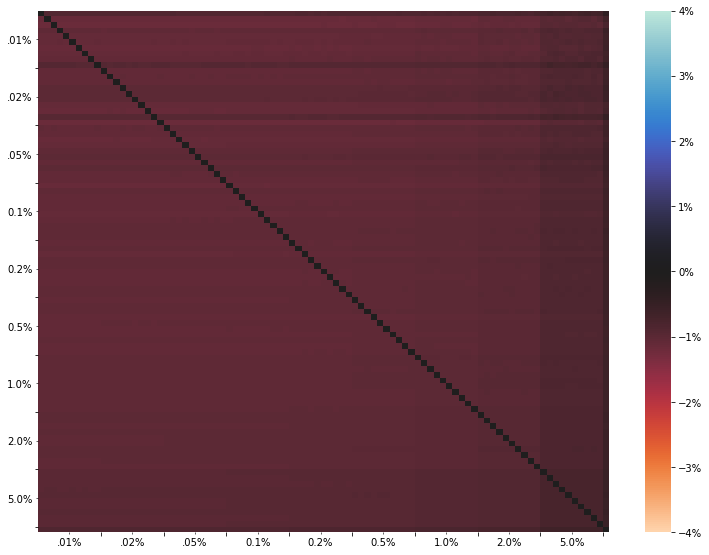

In [50]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cpdm_1_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CNBDM $\zeta = 1$

In [51]:
cnbdm_1_difference_vectors_gluttonous_controls = (cnbdm_1_difference_vectors[...,1,:] + np.swapaxes(cnbdm_1_difference_vectors[...,2,:],0,1))
cnbdm_1_difference_vectors_gluttonous_controls_rel_differences = cnbdm_1_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

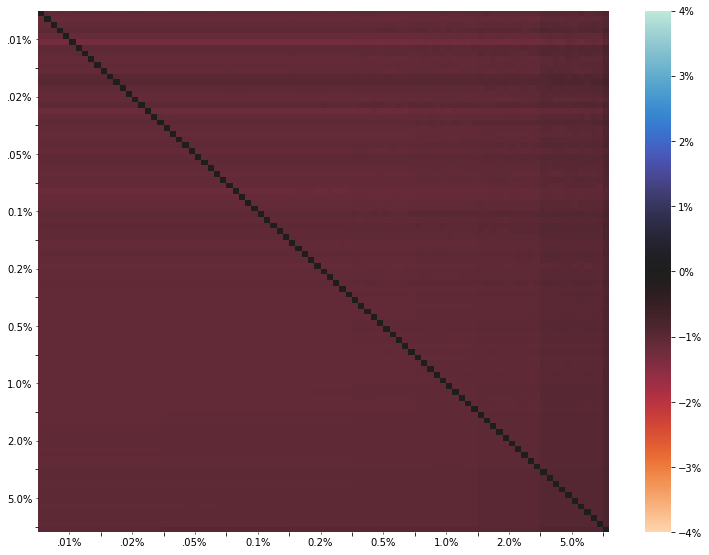

In [52]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cnbdm_1_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CPDM $\zeta \sim \operatorname{Exp}(1)$

In [53]:
cecpdm_difference_vectors_gluttonous_controls = (cecpdm_difference_vectors[...,1,:] + np.swapaxes(cecpdm_difference_vectors[...,2,:],0,1))
cecpdm_difference_vectors_gluttonous_controls_rel_differences = cecpdm_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

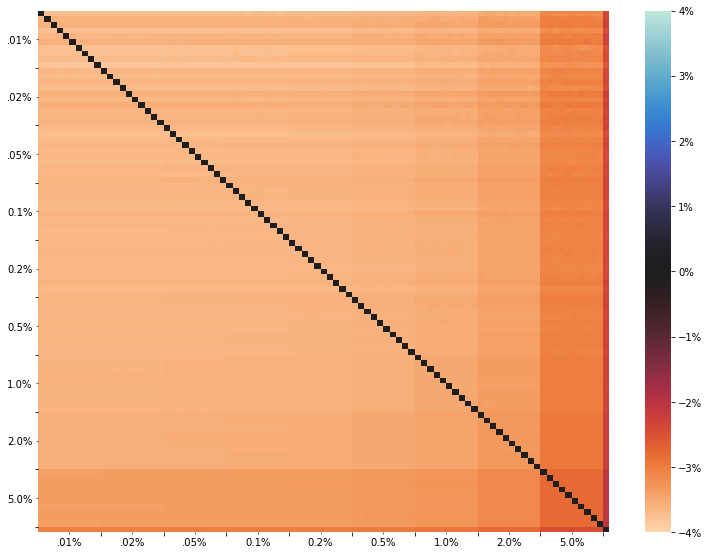

In [54]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cecpdm_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r')
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

#### CNBDM $\zeta \sim \operatorname{Exp}(1)$

In [55]:
cecnbdm_difference_vectors_gluttonous_controls = (cecnbdm_difference_vectors[...,1,:] + np.swapaxes(cecnbdm_difference_vectors[...,2,:],0,1))
cecnbdm_difference_vectors_gluttonous_controls_rel_differences = cecnbdm_difference_vectors_gluttonous_controls / (expected_gluttonous_controls + (expected_gluttonous_controls == 0).astype(float))

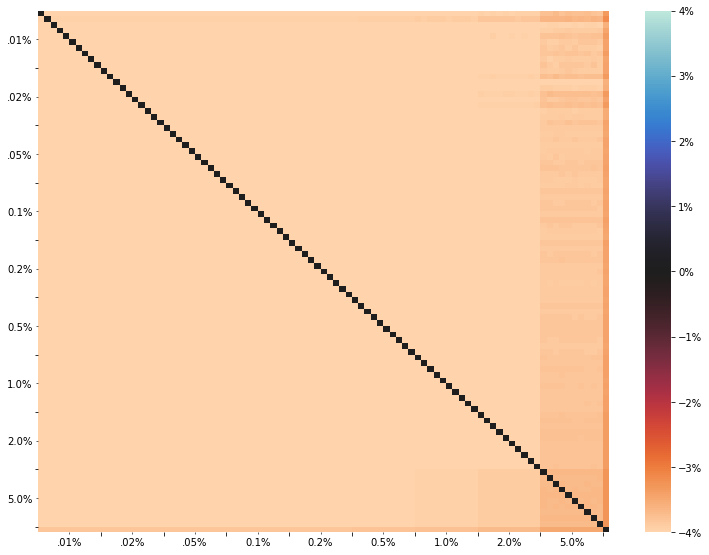

In [56]:
plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cecnbdm_difference_vectors_gluttonous_controls_rel_differences, axis=2),
           vmin=-.04,vmax=.04,cmap='icefire_r', cbar_kws = {'pad': 0.05})

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

## Droplets that have neither of two given strains in them

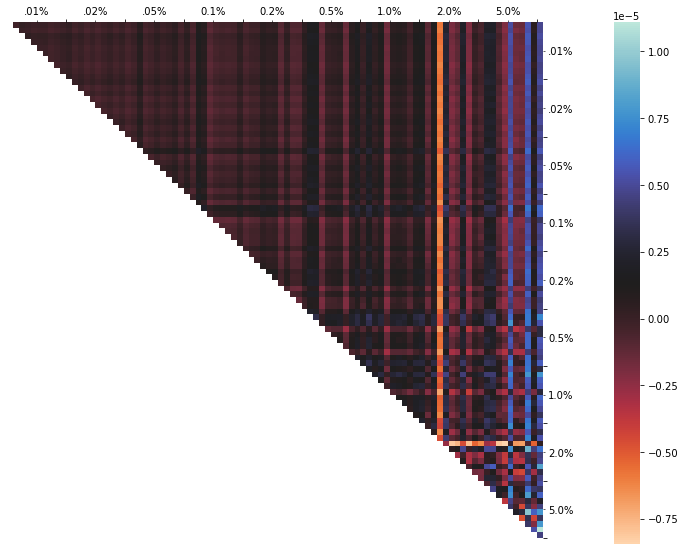

In [57]:
ctpmhg_relative_differences_neither_strain = ctpmhg_relative_differences[...,0,:]

ctpmhg_difference_vectors_neither_strain = ctpmhg_difference_vectors[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(ctpmhg_relative_differences_neither_strain, axis=2), 
#ax = sns.heatmap(np.mean(ctpmhg_difference_vectors_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

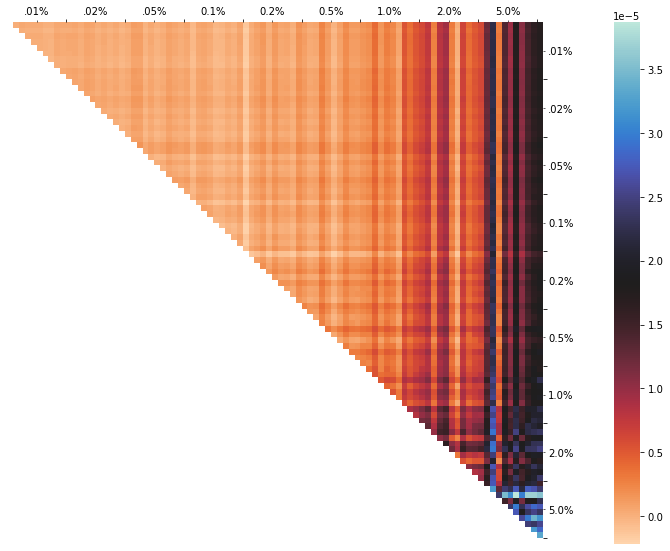

In [58]:
cpdm_100_relative_differences_neither_strain = cpdm_100_relative_differences[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cpdm_100_relative_differences_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

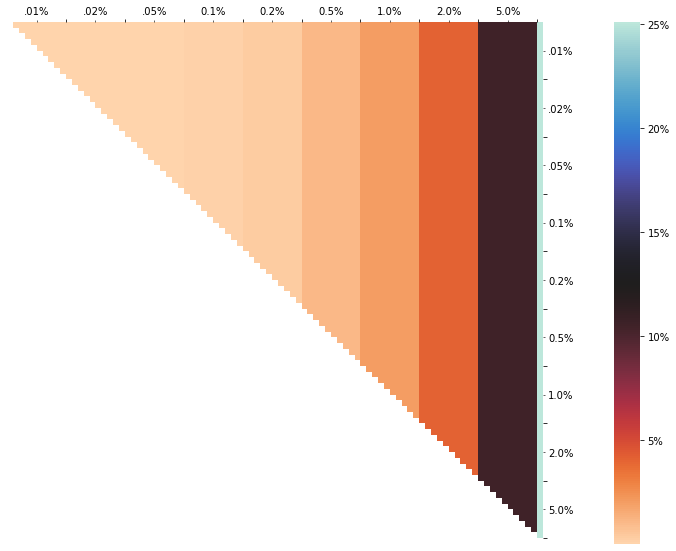

In [59]:
cnbdm_100_relative_differences_neither_strain = cnbdm_100_relative_differences[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cnbdm_100_relative_differences_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

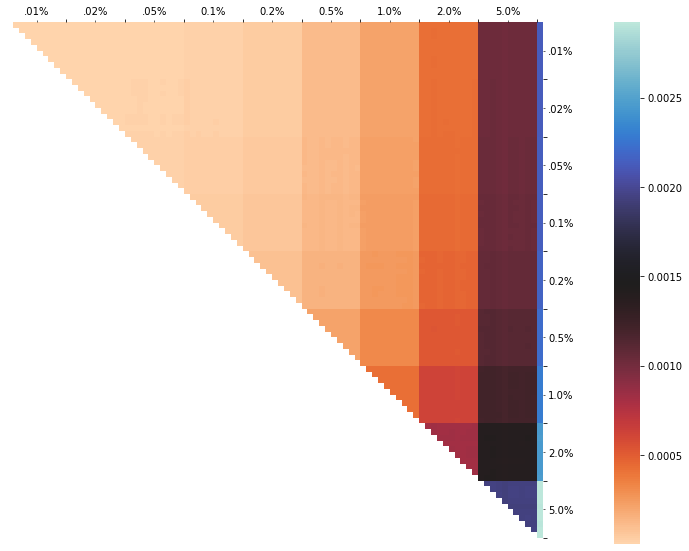

In [60]:
cpdm_1_relative_differences_neither_strain = cpdm_1_relative_differences[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cpdm_1_relative_differences_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

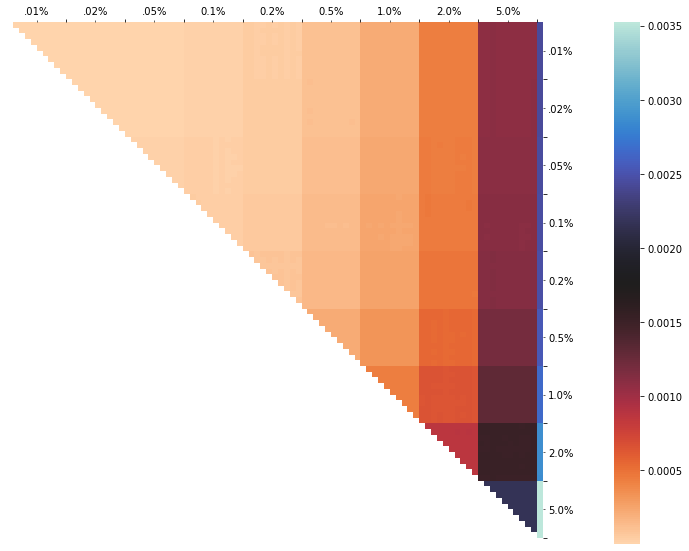

In [61]:
cnbdm_1_relative_differences_neither_strain = cnbdm_1_relative_differences[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cnbdm_1_relative_differences_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

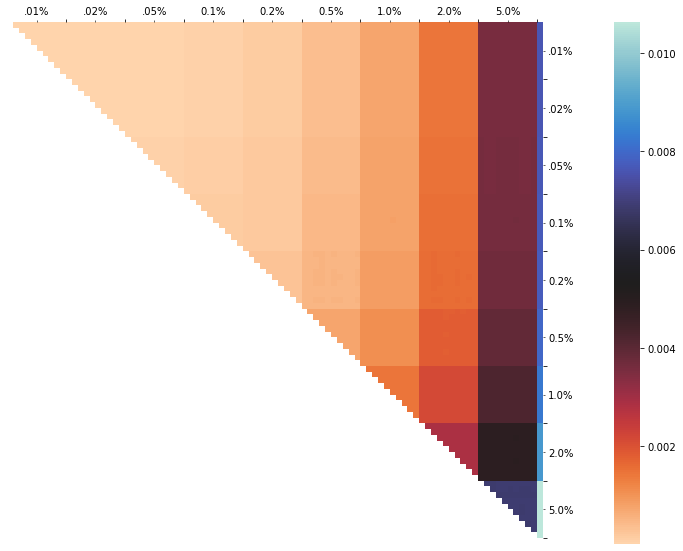

In [62]:
cecpdm_relative_differences_neither_strain = cecpdm_relative_differences[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cecpdm_relative_differences_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)

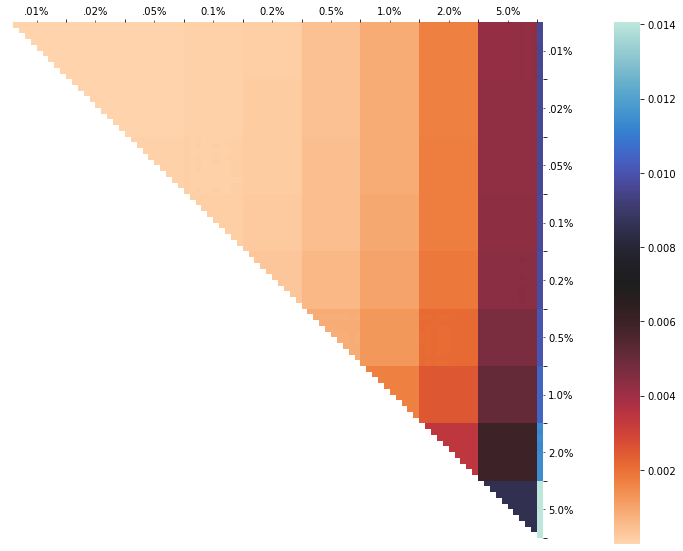

In [63]:
cecnbdm_relative_differences_neither_strain = cecnbdm_relative_differences[...,0,:]

plt.figure(figsize=(12.8,9.6))

ax = sns.heatmap(np.mean(cecnbdm_relative_differences_neither_strain, axis=2), 
                 mask=np.tril(np.ones((frequencies.size, frequencies.size)).astype(bool), k=0),
                cmap='icefire_r', cbar_kws={'pad':0.1})
ax.yaxis.tick_right()
ax.xaxis.tick_top()

cbar = ax.collections[0].colorbar
#cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

add_ticks(ax.xaxis)
add_ticks(ax.yaxis)